# Linear Model

接下来演示$y = \alpha  + \beta x$拟合

## 生成数据

In [40]:
import numpy as np

In [8]:
x = np.random.random(30)
x

array([0.40709392, 0.32550072, 0.65633243, 0.1084764 , 0.61887148,
       0.74660507, 0.56972557, 0.688617  , 0.27720581, 0.52018769,
       0.94047271, 0.3523166 , 0.15637971, 0.57793356, 0.8940457 ,
       0.80048529, 0.70254   , 0.53802859, 0.3306795 , 0.32002037,
       0.01776133, 0.58797297, 0.88826251, 0.58803695, 0.09950929,
       0.64556143, 0.08033406, 0.36325705, 0.55958454, 0.08307838])

In [9]:
help(np.random.random)

Help on built-in function random:

random(...) method of numpy.random.mtrand.RandomState instance
    random(size=None)
    
    Return random floats in the half-open interval [0.0, 1.0). Alias for
    `random_sample` to ease forward-porting to the new random API.



In [11]:
np.random.randn(3, 4)

array([[ 0.20904884, -1.44686201,  0.83839794,  1.66814741],
       [-0.45117576,  2.61886476, -1.4599123 ,  1.36161335],
       [ 0.65418937,  0.7227978 ,  0.09581691,  0.60345393]])

In [12]:
np.random.normal(175, 5, size=10)

array([178.97525299, 177.50998538, 177.94384987, 174.42614233,
       162.36658937, 170.98651546, 172.92241622, 176.46518068,
       182.93763189, 176.48490417])

In [13]:
dir(np.random)

['BitGenerator',
 'Generator',
 'MT19937',
 'PCG64',
 'Philox',
 'RandomState',
 'SFC64',
 'SeedSequence',
 '__RandomState_ctor',
 '__all__',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 '_bounded_integers',
 '_common',
 '_generator',
 '_mt19937',
 '_pcg64',
 '_philox',
 '_pickle',
 '_sfc64',
 'beta',
 'binomial',
 'bit_generator',
 'bytes',
 'chisquare',
 'choice',
 'default_rng',
 'dirichlet',
 'exponential',
 'f',
 'gamma',
 'geometric',
 'get_state',
 'gumbel',
 'hypergeometric',
 'laplace',
 'logistic',
 'lognormal',
 'logseries',
 'mtrand',
 'multinomial',
 'multivariate_normal',
 'negative_binomial',
 'noncentral_chisquare',
 'noncentral_f',
 'normal',
 'pareto',
 'permutation',
 'poisson',
 'power',
 'rand',
 'randint',
 'randn',
 'random',
 'random_integers',
 'random_sample',
 'ranf',
 'rayleigh',
 'sample',
 'seed',
 'set_state',
 'shuffle',
 'standard_cauchy',
 'standard_exponential',
 'stand

In [14]:
x = 10 * x
x

array([4.07093919, 3.25500719, 6.56332427, 1.08476404, 6.18871481,
       7.46605075, 5.69725571, 6.88616997, 2.77205813, 5.20187691,
       9.40472712, 3.52316599, 1.56379709, 5.77933563, 8.94045704,
       8.00485289, 7.02539999, 5.38028589, 3.30679502, 3.20020372,
       0.1776133 , 5.87972974, 8.88262513, 5.88036949, 0.99509292,
       6.45561434, 0.80334062, 3.63257048, 5.59584536, 0.83078382])

In [18]:
y = 20*x + 3
y

array([ 84.41878388,  68.10014372, 134.26648537,  24.69528084,
       126.77429626, 152.3210149 , 116.94511426, 140.72339945,
        58.44116255, 107.03753825, 191.0945424 ,  73.4633198 ,
        34.27594188, 118.58671262, 181.80914086, 163.09705778,
       143.50799977, 110.60571781,  69.13590044,  67.0040743 ,
         6.55226596, 120.59459483, 180.6525026 , 120.60738976,
        22.90185842, 132.11228683,  19.06681232,  75.65140966,
       114.9169071 ,  19.61567639])

增加扰动项：$y = ax + b + \varepsilon $

In [17]:
y = 20 * x + 3 + np.random.randn(30)
y

array([ 84.81911492,  68.3610893 , 133.62615183,  27.19598292,
       127.0405575 , 150.88312723, 116.41391583, 139.29594329,
        56.27144053, 106.874556  , 190.41183849,  74.39849122,
        33.33056105, 117.14869041, 180.62790526, 163.14339772,
       143.30831212, 109.48907298,  69.75107773,  67.41952211,
         5.16803848, 121.76358198, 181.05763   , 121.98142944,
        22.83167597, 133.5035018 ,  18.92978787,  75.41738696,
       114.54148308,  18.90106466])

## 绘制散点图 

In [19]:
from plotnine import *
import pandas as pd
%matplotlib inline

In [20]:
x_y = pd.DataFrame({'x':x, 'y':y})
x_y

,x,y
0,4.070939,84.418784
1,3.255007,68.100144
2,6.563324,134.266485
3,1.084764,24.695281
4,6.188715,126.774296
5,7.466051,152.321015
6,5.697256,116.945114
7,6.886170,140.723399
8,2.772058,58.441163
9,5.201877,107.037538


In [ ]:
x_y.describe()

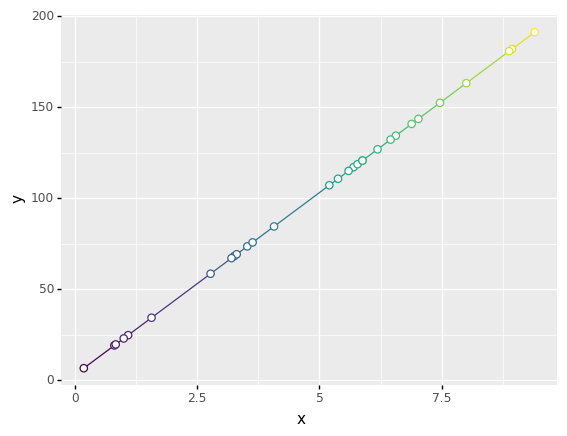

<ggplot: (160730377966)>

In [23]:
(
    ggplot(x_y, aes(x='x', y='y', colour='x+y')) +
    geom_line() +
    geom_point(fill='white', size=2.5) +
    theme(legend_position='none')
)

## 模型拟合

In [26]:
from sklearn.linear_model import LinearRegression

In [27]:
reg = LinearRegression()

In [28]:
x = x.reshape(-1, 1)

In [29]:
reg.fit(x, y)

LinearRegression()

In [30]:
print("Fitted lm model is y={:.3}x+{:.3}".format(reg.coef_[0], reg.intercept_))

Fitted lm model is y=20.0x+3.0


## 拟合效果

In [32]:
yhat = reg.predict(x)
yhat

array([ 84.41878388,  68.10014372, 134.26648537,  24.69528084,
       126.77429626, 152.3210149 , 116.94511426, 140.72339945,
        58.44116255, 107.03753825, 191.0945424 ,  73.4633198 ,
        34.27594188, 118.58671262, 181.80914086, 163.09705778,
       143.50799977, 110.60571781,  69.13590044,  67.0040743 ,
         6.55226596, 120.59459483, 180.6525026 , 120.60738976,
        22.90185842, 132.11228683,  19.06681232,  75.65140966,
       114.9169071 ,  19.61567639])

In [33]:
x

array([[4.07093919],
       [3.25500719],
       [6.56332427],
       [1.08476404],
       [6.18871481],
       [7.46605075],
       [5.69725571],
       [6.88616997],
       [2.77205813],
       [5.20187691],
       [9.40472712],
       [3.52316599],
       [1.56379709],
       [5.77933563],
       [8.94045704],
       [8.00485289],
       [7.02539999],
       [5.38028589],
       [3.30679502],
       [3.20020372],
       [0.1776133 ],
       [5.87972974],
       [8.88262513],
       [5.88036949],
       [0.99509292],
       [6.45561434],
       [0.80334062],
       [3.63257048],
       [5.59584536],
       [0.83078382]])

In [34]:
x_y_yhat = pd.DataFrame({'x':x.flatten(), 'y':y, 'yhat':yhat})

In [36]:
x_y_yhat_melt = pd.melt(x_y_yhat, id_vars='x', var_name='y_type', value_name='value')
x_y_yhat_melt

,x,y_type,value
0,4.070939,y,84.418784
1,3.255007,y,68.100144
2,6.563324,y,134.266485
3,1.084764,y,24.695281
4,6.188715,y,126.774296
5,7.466051,y,152.321015
6,5.697256,y,116.945114
7,6.886170,y,140.723399
8,2.772058,y,58.441163
9,5.201877,y,107.037538


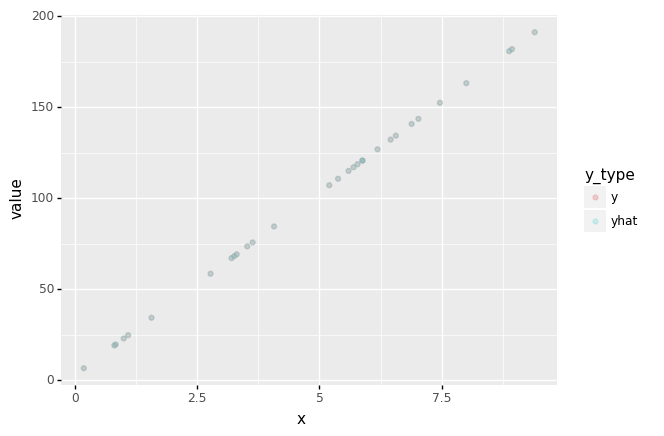

<ggplot: (160731039657)>

In [38]:
(
    ggplot(x_y_yhat_melt, aes(x='x', y='value', colour='y_type')) +
    geom_point(alpha=0.25)
)

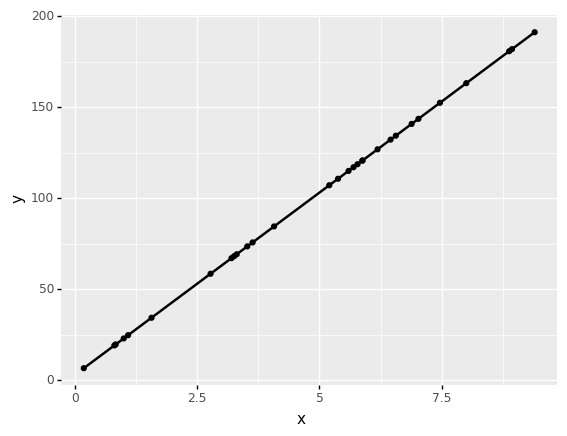

<ggplot: (160730377759)>

In [39]:
(
    ggplot(x_y, aes(x='x', y='y')) +
    geom_point() +
    geom_smooth(method='lm')
)

In [ ]:
from statsmodels.api import OLS

In [ ]:
lm2 = OLS(x, y).fit()

In [ ]:
lm2.summary()